**Linear regression**

Task 1: Stochastic Gradient Descent

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt

# Set random seed
np.random.seed(1234)
torch.manual_seed(1234)

# Function to create synthetic data
def create_toy_data(func, sample_size, std, domain=[0, 1]):
    x = np.linspace(domain[0], domain[1], sample_size)
    np.random.shuffle(x)
    y = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, y

# Define sinusoidal function
def sinusoidal(x):
    return np.sin(2 * np.pi * x)


x_train, y_train = create_toy_data(sinusoidal, 10, 0.25)
x_test = np.linspace(0, 1, 100)
y_test = sinusoidal(x_test)



In [3]:
# Print the shapes of the training and test datasets
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

Training data shape: (10,)
Training labels shape: (10,)
Test data shape: (100,)
Test labels shape: (100,)


In [4]:
x_train=torch.FloatTensor(x_train.reshape(-1,1))
y_train=torch.FloatTensor(y_train.reshape(-1,1))
x_test=torch.FloatTensor(x_test.reshape(-1,1))
y_test=torch.FloatTensor(y_test.reshape(-1,1))

In [5]:
def generate_polynomial_features(input_tensor, max_degree=10):
# Generate polynomial features up to the specified maximum degree
    return torch.cat([input_tensor ** i for i in range(1, max_degree + 1)], dim=1)


In [6]:
# Generate polynomial features for training and test datasets
x_train_poly = generate_polynomial_features(x_train, max_degree=10)
x_test_poly = generate_polynomial_features(x_test, max_degree=10)


In [7]:
# Print the shapes of the training and test datasets after generating polynomial features
print("Training polynomial features shape:", x_train_poly.shape)
print("Training labels shape:", y_train.shape)
print("Test polynomial features shape:", x_test_poly.shape)
print("Test labels shape:", y_test.shape)


Training polynomial features shape: torch.Size([10, 10])
Training labels shape: torch.Size([10, 1])
Test polynomial features shape: torch.Size([100, 10])
Test labels shape: torch.Size([100, 1])


In [8]:
class LinearRegression:
    def __init__(self, input_dimension, regularization_lambda, degree=10):
        # Initialize weights and bias with random values
        self.W = torch.randn(input_dimension, 1, requires_grad=True)
        self.b = torch.randn(1, requires_grad=True)
        self.lambdar = regularization_lambda
        self.degree = degree

    def forward(self, x):
        # Compute predicted output
        y_pred = torch.matmul(x, self.W) + self.b
        return y_pred

    def loss(self, x, y):
        # Compute loss value including L2 regularization
        y_pred = self.forward(x)
        mse_loss = torch.mean((y_pred - y) ** 2)
        l2_penalty = self.lambdar * torch.norm(self.W, 2)
        return mse_loss + l2_penalty


In [9]:
def stochastic_gradient_descent(model, x, y, learning_rate, num_epochs, batch_size):
    losses = []  # List to store the average losses for each epoch
    for epoch in range(num_epochs):
        epoch_loss = 0
        for i in range(0, x.shape[0], batch_size):
            x_batch = x[i:i + batch_size]
            y_batch = y[i:i + batch_size]
            loss = model.loss(x_batch, y_batch)
            loss.backward()  # Backpropagation
            with torch.no_grad():
                # Update weights and bias
                model.W -= learning_rate * model.W.grad
                model.b -= learning_rate * model.b.grad
                # Zero the gradients for the next iteration
                model.W.grad.zero_()
                model.b.grad.zero_()
            epoch_loss += loss.item()  # Accumulate loss for the epoch
        loss_averaged = epoch_loss / (len(x) // batch_size)  # Average loss for the epoch
        losses.append(loss_averaged)
        if epoch % 100 == 0:  # Print loss every 100 epochs
            print(f'Epoch: {epoch}, Loss: {loss_averaged:.4f}')
    return losses


In [10]:
# Hyperparameters for training
learning_rate = 0.01
num_epochs = 5000
batch_size = 1
regularization_lambda = 0.01


In [11]:
# Initialize the Linear Regression model with correct input dimension
model = LinearRegression(input_dimension=10, regularization_lambda=regularization_lambda)

# Train the model using stochastic gradient descent
losses_sgd = stochastic_gradient_descent(model, x_train_poly, y_train, learning_rate, num_epochs, batch_size)


Epoch: 0, Loss: 1.1652
Epoch: 100, Loss: 0.2231
Epoch: 200, Loss: 0.2153
Epoch: 300, Loss: 0.2107
Epoch: 400, Loss: 0.2071
Epoch: 500, Loss: 0.2039
Epoch: 600, Loss: 0.2012
Epoch: 700, Loss: 0.1988
Epoch: 800, Loss: 0.1968
Epoch: 900, Loss: 0.1949
Epoch: 1000, Loss: 0.1932
Epoch: 1100, Loss: 0.1917
Epoch: 1200, Loss: 0.1904
Epoch: 1300, Loss: 0.1892
Epoch: 1400, Loss: 0.1880
Epoch: 1500, Loss: 0.1870
Epoch: 1600, Loss: 0.1860
Epoch: 1700, Loss: 0.1852
Epoch: 1800, Loss: 0.1843
Epoch: 1900, Loss: 0.1836
Epoch: 2000, Loss: 0.1829
Epoch: 2100, Loss: 0.1822
Epoch: 2200, Loss: 0.1816
Epoch: 2300, Loss: 0.1810
Epoch: 2400, Loss: 0.1805
Epoch: 2500, Loss: 0.1799
Epoch: 2600, Loss: 0.1795
Epoch: 2700, Loss: 0.1790
Epoch: 2800, Loss: 0.1785
Epoch: 2900, Loss: 0.1781
Epoch: 3000, Loss: 0.1777
Epoch: 3100, Loss: 0.1774
Epoch: 3200, Loss: 0.1770
Epoch: 3300, Loss: 0.1767
Epoch: 3400, Loss: 0.1763
Epoch: 3500, Loss: 0.1760
Epoch: 3600, Loss: 0.1757
Epoch: 3700, Loss: 0.1754
Epoch: 3800, Loss: 0.175

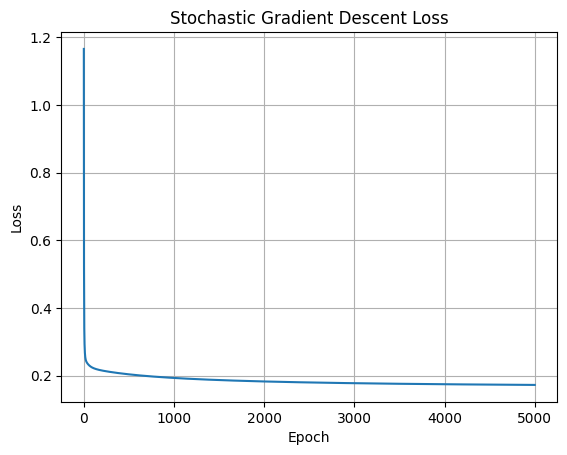

In [12]:
# Plot the average loss over epochs
plt.plot(losses_sgd)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Stochastic Gradient Descent Loss")
plt.grid(True)
plt.show()

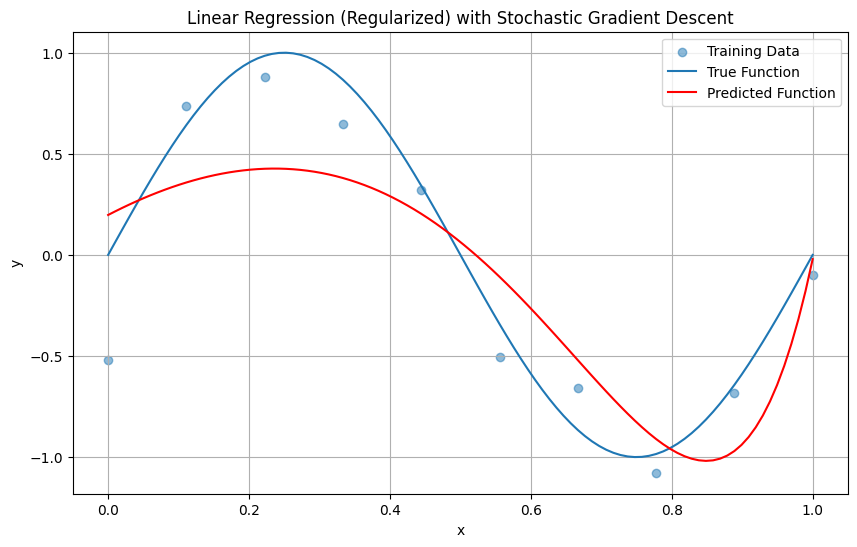

In [13]:
# Set the size of the plot
plt.figure(figsize=(10, 6))

# Scatter plot of training data
plt.scatter(x_train[:, 0].numpy(), y_train.numpy(), label="Training Data", alpha=0.5)

# Generate points for plotting the predicted function
x_plot = torch.linspace(0, 1, 100).reshape(-1, 1)
x_plot_poly = generate_polynomial_features(x_plot, max_degree=10)

# Compute predictions without tracking gradients
with torch.no_grad():
    y_pred = model.forward(x_plot_poly)

# Plot the true function and the predicted function
plt.plot(x_plot, sinusoidal(x_plot), label="True Function")
plt.plot(x_plot, y_pred, label="Predicted Function", color='r')

# Labeling the plot
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Linear Regression (Regularized) with Stochastic Gradient Descent")
plt.grid(True)
plt.show()

## Equations

### Prediction:

$$
\hat{y} = X \cdot w
$$

### Forward pass equation
$$
y_p(x) = wx + b
$$

Where \(X\) is the input data, and \(w\) is the weights vector.

### Loss (Mean Squared Error + L2 Regularization):

$$
L(w) = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_{i} - y_{i})^2 + \lambda \sum_{j=1}^{m} w_{j}^2
$$

### Loss gradient wrt weight
$$
\frac{\partial L}{\partial w} = \frac{2}{n}\sum_{i=1}^n (y_p(x_i) - y_i)x_i + 2\lambda w
$$

### Loss gradient wrt bias
$$
\frac{\partial L}{\partial b} = \frac{2}{n}\sum_{i=1}^n (y_p(x_i) - y_i)
$$

### Weight update:
$$
w = w - \alpha \frac{\partial L}{\partial w}
$$

### Bias update:
$$
b = b - \alpha \frac{\partial L}{\partial b}
$$

**Where:**
- $n$ is batch size
- $\lambda$ is regularization parameter
- $\alpha$ is learning rate

### Hyperparameters Used:

- Learning rate: 0.01
- Number of epochs: 5000
- Batch size: 1
- Regularization parameter (lambda): 0.01
- Momentum Coefficient: 0.9 (used only for the momentum algorithm)



Task 2: Momentum


In [14]:
def momentum(model, x, y, learning_rate, momentum_coefficient, epochs, batch_size, beta):
    losses = []  # List to store average losses for each epoch
    v_w = torch.zeros(model.W.shape)
    v_b = torch.zeros(model.b.shape)
    for epoch in range(epochs):
        epoch_loss = 0
        for i in range(0, x.shape[0], batch_size):
            x_batch = x[i:i + batch_size]
            y_batch = y[i:i + batch_size]
            loss = model.loss(x_batch, y_batch)
            loss.backward()

            with torch.no_grad():
                # Update velocities
                v_w = momentum_coefficient * v_w + learning_rate * model.W.grad
                v_b = momentum_coefficient * v_b + learning_rate * model.b.grad

                # Update weights and bias
                model.W -= v_w
                model.b -= v_b

                # Zero the gradients for the next iteration
                model.W.grad.zero_()
                model.b.grad.zero_()

            epoch_loss += loss.item()  # Accumulate loss for the epoch
        loss_averaged = epoch_loss / (len(x) // batch_size)  # Average loss for the epoch
        losses.append(loss_averaged)
        if epoch % 100 == 0:  # Print loss every 100 epochs
            print('Epoch: ', epoch, '\t Loss: ', loss_averaged)
    return losses


In [17]:
momentum_coefficient = 0.9  # Determines the contribution of the previous gradient to the current update


In [22]:
# Initialize the Linear Regression model for momentum training
model_momentum = LinearRegression(input_dimension=10, regularization_lambda=regularization_lambda)

# Define a value for beta
beta = 0.9

# Train the model using momentum-based gradient descent
losses_momentum = momentum(model_momentum, x_train_poly, y_train, learning_rate, momentum_coefficient, num_epochs, batch_size, beta)


Epoch:  0 	 Loss:  1.461011742055416
Epoch:  100 	 Loss:  0.19342486932873726
Epoch:  200 	 Loss:  0.1833535697311163
Epoch:  300 	 Loss:  0.17847116924822332
Epoch:  400 	 Loss:  0.17553562447428703
Epoch:  500 	 Loss:  0.1735986176878214
Epoch:  600 	 Loss:  0.17224643975496293
Epoch:  700 	 Loss:  0.17126427218317986
Epoch:  800 	 Loss:  0.17052946388721466
Epoch:  900 	 Loss:  0.1699671983718872
Epoch:  1000 	 Loss:  0.16952924244105816
Epoch:  1100 	 Loss:  0.16918331608176232
Epoch:  1200 	 Loss:  0.16890690103173256
Epoch:  1300 	 Loss:  0.1686839573085308
Epoch:  1400 	 Loss:  0.1685026168823242
Epoch:  1500 	 Loss:  0.16835410073399543
Epoch:  1600 	 Loss:  0.16823178082704543
Epoch:  1700 	 Loss:  0.1681303933262825
Epoch:  1800 	 Loss:  0.16804603561758996
Epoch:  1900 	 Loss:  0.16797548308968543
Epoch:  2000 	 Loss:  0.16791629269719124
Epoch:  2100 	 Loss:  0.16786636859178544
Epoch:  2200 	 Loss:  0.16782423257827758
Epoch:  2300 	 Loss:  0.16778844967484474
Epoch:  2400

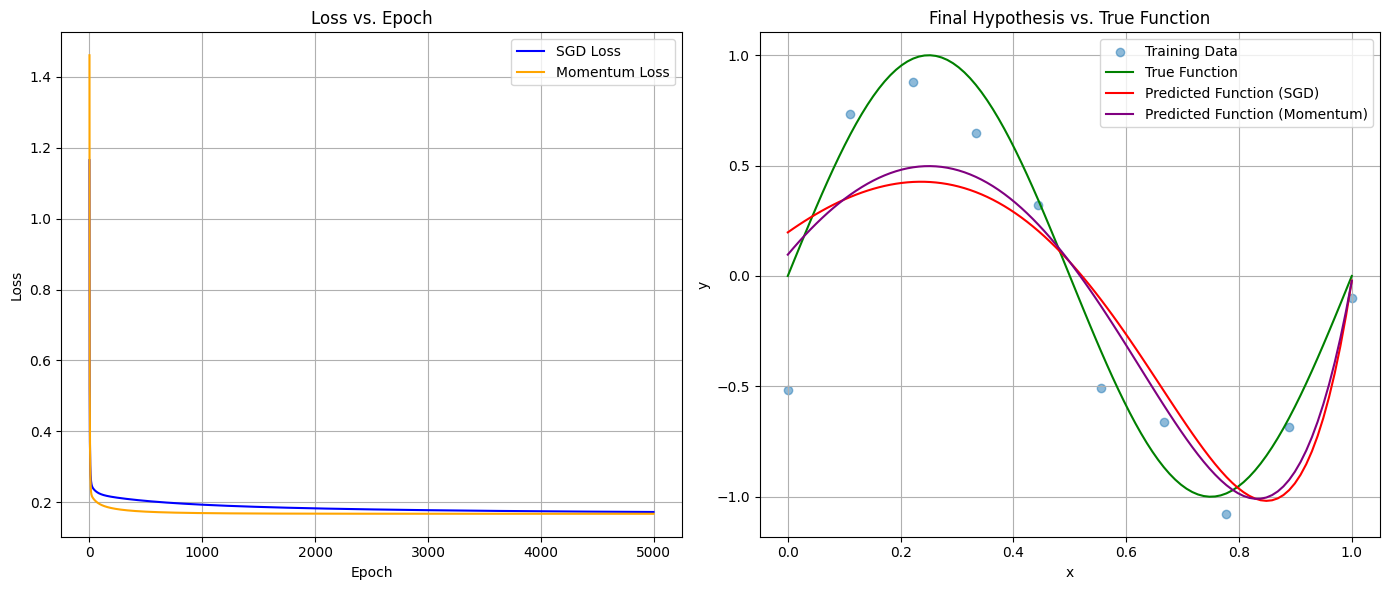

In [28]:
# Assuming 'losses_sgd' and 'losses_momentum' are already computed from the previous training steps

# Set the size of the plot for better visualization
plt.figure(figsize=(14, 6))

# Plotting the loss vs. epoch for SGD
plt.subplot(1, 2, 1)
plt.plot(losses_sgd, label='SGD Loss', color='blue')
plt.plot(losses_momentum, label='Momentum Loss', color='orange')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs. Epoch")
plt.legend()
plt.grid(True)

# Plotting the final hypothesis
plt.subplot(1, 2, 2)
plt.scatter(x_train[:, 0].numpy(), y_train.numpy(), label="Training Data", alpha=0.5)

# Generate points for plotting the predicted function for SGD
with torch.no_grad():
    y_pred_sgd = model.forward(x_plot_poly)

# Plot the true function and the predicted function for SGD
plt.plot(x_plot, sinusoidal(x_plot), label="True Function", color='green')
plt.plot(x_plot, y_pred_sgd, label="Predicted Function (SGD)", color='red')

# Generate points for plotting the predicted function for Momentum
with torch.no_grad():
    y_pred_momentum = model_momentum.forward(x_plot_poly)

# Plot the predicted function for Momentum
plt.plot(x_plot, y_pred_momentum, label="Predicted Function (Momentum)", color='purple')

# Labeling the final hypothesis plot
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Final Hypothesis vs. True Function")
plt.grid(True)

# Show all plots
plt.tight_layout()
plt.show()